In [27]:
import pandas as pd
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score

In [3]:
df=pd.read_csv("C:\pandas\Machine Learning\Kaggle\heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
alive=df[df['DEATH_EVENT']==0]
alive.shape

(203, 13)

In [8]:
death=df[df['DEATH_EVENT']==1]
death.shape

(96, 13)

In [9]:
get_mean=df.groupby('DEATH_EVENT').mean()
get_mean

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


In [10]:
# As we can see from the above table which factor are matter most for CVD attak
# Age factor matter
# creatinine_phosphokinase matter
# ejection_fraction
# high_blood_pressure matter
# platelet matter
# serum_creatinine matter
# serum_sodium matter
# sex matter
# smoking matter 

In [56]:
input_x=df[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking']]
final_x=df['DEATH_EVENT']

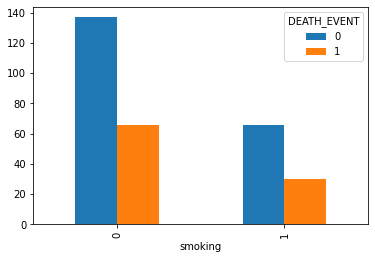

In [49]:
pd.crosstab(df['smoking'],df['DEATH_EVENT']).plot(kind="bar")

In [57]:
cross_val_score(linear_model.LogisticRegression(),input_x,target_x)

array([0.75      , 0.73333333, 0.68333333, 0.76666667, 0.72881356])

In [58]:
cross_val_score(tree.DecisionTreeClassifier(criterion='entropy'),input_x,target_x)

array([0.68333333, 0.75      , 0.63333333, 0.66666667, 0.59322034])

In [59]:
X_train,X_test,y_train,y_test=train_test_split(input_x,target_x,test_size=0.1)

In [60]:
log=linear_model.LogisticRegression()
log.fit(X_train,y_train)


LogisticRegression()

In [61]:
log.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [62]:
log.score(X_test,y_test)

0.6666666666666666

In [63]:
log.predict([[75,0,582,0,20,1,265000,1.9,130,1,0]])

array([1], dtype=int64)

In [65]:
log.predict([[49,1,80,0,30,1,427000,1,138,0,0]])

array([0], dtype=int64)